# Notebook example

This notebook analyses and visualizes the results of a `libE_opt` optimization.

## Initialize the class for post processing and loads history data

In [1]:
import numpy as np
from libe_opt_postproc.post_processing import PostProcOptimization

In [2]:
# Modify the path below, to point to your optimization
pp = PostProcOptimization('/beegfs/desy/group/mpa/mpa1/delaossa/WAKE-T/lux_opt')

libE parameters:     ['sim_id', 'gen_worker', 'gen_time', 'last_gen_time', 'given', 'given_time', 'last_given_time', 'last_given_back_time', 'returned', 'returned_time', 'sim_worker', 'cancel_requested', 'kill_sent', 'given_back', 'resource_sets', 'f']
Varying parameters:  ['beam_i0', 'beam_i1']
Analyzed quantities: ['s_fwhm', 'mad_rel', 'med', 'efficiency', 'q']


When only the path is passed to PostProcOptimization, it would try to find out the specific variables of your optimization by searching the `varying_parameters.py` file.
If not present, the user would need to tell manually which are those, e.g.: `pp = PostProcOptimization('path', varpars=['x0', 'x1', ...])`

## Plotting optimization run versus time

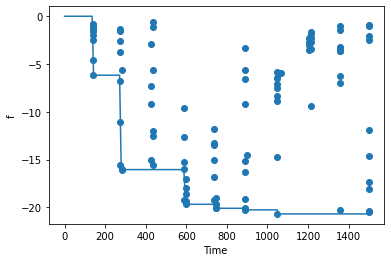

In [3]:
pp.plot_optimization()
t0 = np.linspace(0, pp.get_df()['returned_time'].max(), 200 )
pp.get_trace(plot=True, t_array=t0);

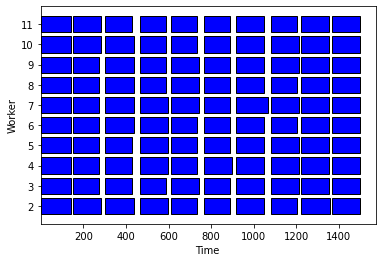

In [4]:
pp.plot_worker_timeline()

## Plotting history file

['f', 'beam_i0', 'beam_i1']


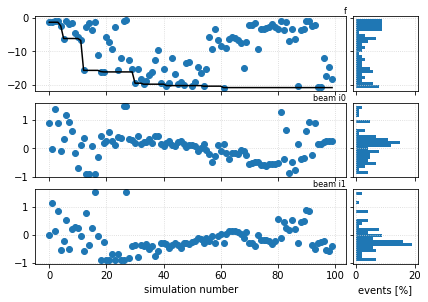

In [5]:
# with no arguments, `plot_history()` will print the score function plus the varying parameters
pp.plot_history()

Selecting according to the condition:  f < -15.000000
['f', 'beam_i0', 'beam_i1']


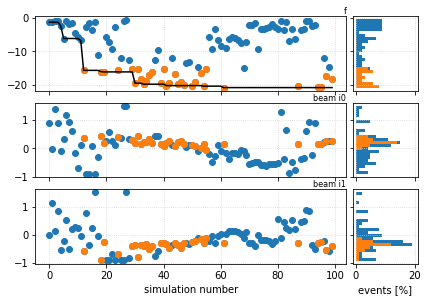

In [6]:
# highlight points according to a selection criteria
pp.plot_history(select={'f': [None, -15]})

Selecting according to the condition:  f < -15.000000
['f', 'beam_i0', 'beam_i1']


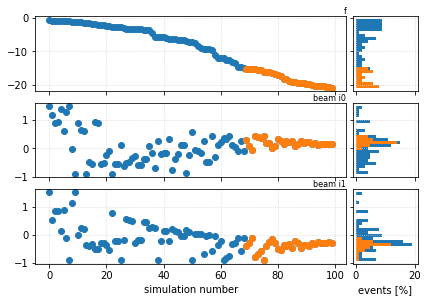

In [7]:
# sort simulations
pp.plot_history(select={'f': [None, -15]}, sort={'f': False})

Selecting according to the condition:  f < -15.000000 and beam_i0 > 0.000000 and beam_i0 < 0.200000


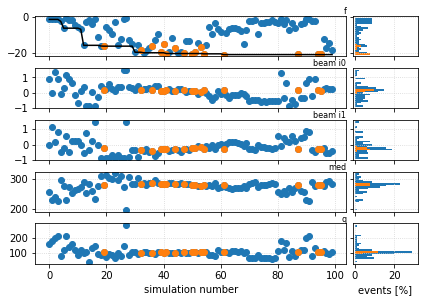

In [8]:
# manually select the parameters to show
pp.plot_history(parnames=['f', 'beam_i0', 'beam_i1', 'med', 'q'], select={'f': [None, -15], 'beam_i0': [0.0, 0.2] })

## Plotting GP model

In [9]:
# Use data present in the history file to build a GP model with Ax
pp.build_model_ax()

[INFO 02-18 17:28:04] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='beam_i0', parameter_type=FLOAT, range=[-0.9, 1.5]), RangeParameter(name='beam_i1', parameter_type=FLOAT, range=[-0.9, 1.5])], parameter_constraints=[]).


Plotting the model in the beam_i0 vs beam_i1 plane
Best point parameters:  {'beam_i0': 0.14834855791922885, 'beam_i1': -0.2715135881924431}
Best point prediction:  ({'f': -20.438732959305558}, {'f': {'f': 0.003134807747170296}})


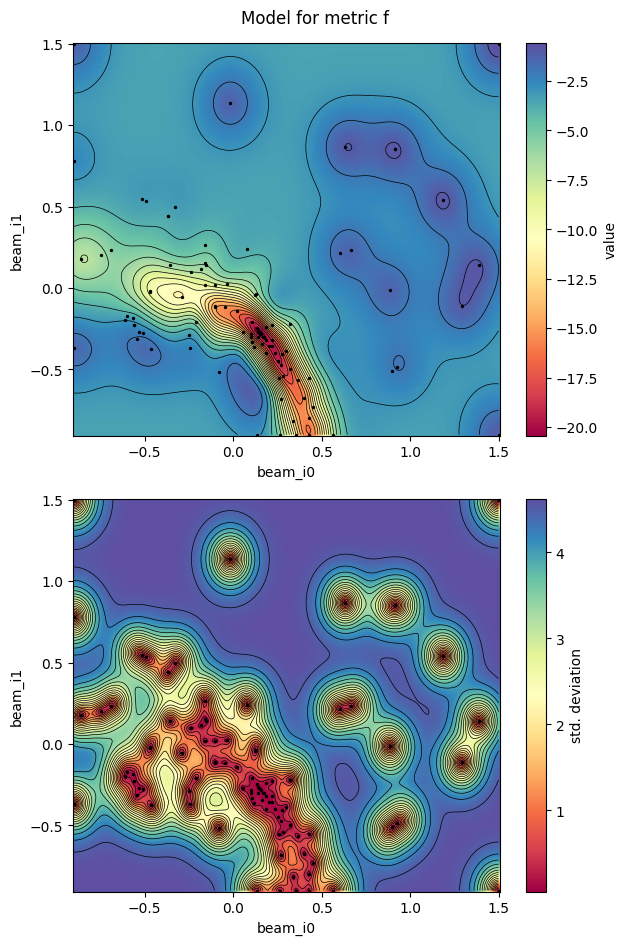

In [10]:
# Plot the model in the 2D plane specified. By default it takes the two first varying parameters in the list.
# One can specify manually by setting the argumens `xname` and `yname` in `plot_model()`
# The rest of parameters are fixed to the optimal values.
pp.plot_model()

In [11]:
# A different GP model can be fitted targeting a different score function, e.g.
pp.build_model_ax(objname='mad_rel', minimize=True)

[INFO 02-18 17:28:08] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='beam_i0', parameter_type=FLOAT, range=[-0.9, 1.5]), RangeParameter(name='beam_i1', parameter_type=FLOAT, range=[-0.9, 1.5])], parameter_constraints=[]).


Plotting the model in the beam_i0 vs beam_i1 plane
Best point parameters:  {'beam_i0': 0.1571295697014926, 'beam_i1': -0.2817420355395872}
Best point prediction:  ({'mad_rel': 0.5156861010865739}, {'mad_rel': {'mad_rel': 0.00020360734588930346}})


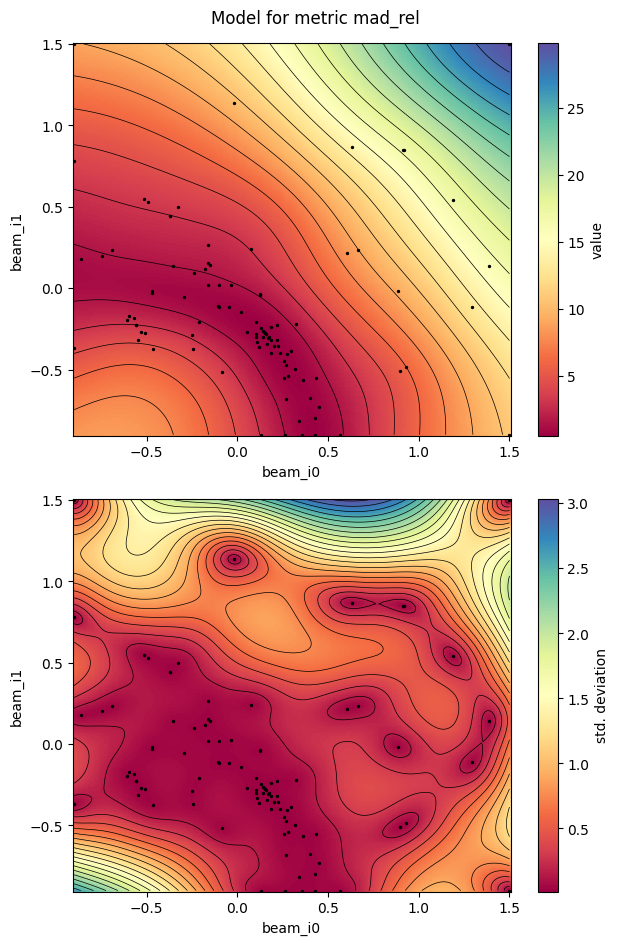

In [12]:
pp.plot_model()